In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [6]:
# copy demo into current directory
ac.copydemo('bvp')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Compute the zero solution branch***")
bvp = ac.run(e='bvp',c='bvp',runner=runner)
ac.save(bvp,'bvp')

print("\n***Compute bifurcating branches***")
for bp in bvp("BP"):
    solution = ac.load(bp,ISW=-1,DSMAX=10,UZR={2:[-6.0,-3.0,3.0,6.0]},
                                       UZSTOP={1:[0.0,5.5],
                                               2:[-9.0,9.0]},
                                       runner=runner)
    print("\n***Branch " , solution["LAB"] , "***")
    bvp = bvp + ac.run(solution,runner=runner)
    bvp = bvp + ac.run(solution,DS='-',runner=runner)

print("\n***Relabel and save the output***")
bvp = ac.relabel(bvp)
ac.save(bvp,'bvp')

Copying demo bvp ... done

***Compute the zero solution branch***
gfortran -fopenmp -O -c bvp.f90 -o bvp.o
gfortran -fopenmp -O bvp.o -o bvp.exe /auto/lib/*.o
Starting bvp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(2)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     6  BP    2   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    11  BP    3   2.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    16  BP    4   3.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    21  BP    5   4.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    26  BP    6   5.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    29  UZ    7   5.50000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.690E-01
bvp ... done
Saving to b.bvp, s.bvp, and d.bvp ... done

***Compute bifurcat

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(2)     
   2    14  UZ    8   7.69103E-01   1.10302E+01   0.00000E+00   1.43493E+01  -3.00000E+00
   2    18  UZ    9   4.19634E-01   2.21764E+01   0.00000E+00   2.77601E+01  -6.00000E+00
   2    25  UZ   10  -2.81413E-05   2.68854E+01   1.48706E-24   3.30822E+01  -7.25520E+00

 Total Time    0.461E-01
bvp ... done
Runner configured

***Branch  3 ***
Starting bvp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(2)     
   2    43  UZ    8   2.12178E+00   7.14503E+01   1.77317E+01   1.01295E+02   3.00000E+00
   2    51  UZ    9   2.23497E+00   1.04083E+02   2.66634E+01   1.49745E+02   6.00000E+00
   2    56  UZ   10   2.34100E+00   1.31101E+02   3.42095E+01   1.91340E+02   9.00000E+00

 Total Time    0.638E-01
bvp ... done
Starting bvp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(2)     
   2    43  UZ    8   2.12178E+00   

Created plot


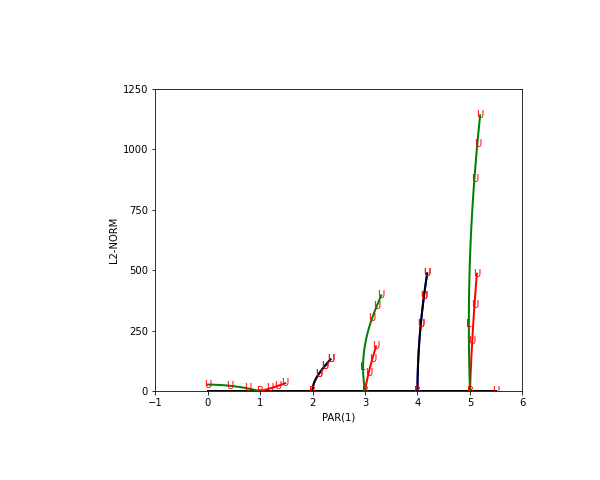

In [8]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot(bvp)
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [9]:
# clean up files

ac.clean()
ac.delete('bvp')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.bvp ... done
Deleting s.bvp ... done
Deleting d.bvp ... done
